#  Importing Libraries / Setting up API 

In [127]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [128]:
client_id='7501a9f819ba48b38bbdd72832bf647c'
client_secret='0da2c2a0bd1f4823a514de9321668c02'

In [129]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Creating Necessary Extraction Functions 

In [130]:
def getURI(link):
    uri = link.split("/")[-1].split("?")[0]
    return uri

In [131]:
print("Top Tracks URIs:")
print("2010: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj?si=5bc20ebe913a4fd9'))
print("2011: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ?si=5a66f2c17b0e4e26'))
print("2012: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3?si=66c90638f6bb4bf2'))
print("2013: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer?si=466fce5f0be24bc0'))
print("2014: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4?si=9c221c091a894da8'))
print("2015: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DX9ukdrXQLJGZ?si=697293bbe1354d8c'))
print("2016: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DX8XZ6AUo9R4R?si=af656b18972b493a'))
print("2017: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW?si=39ad76fa41b64954'))
print("2018: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8?si=bd45c9753e7b4c59'))
print("2019: ", getURI('https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9?si=812f09e8838f4ddb'))
print("2020: ", getURI('https://open.spotify.com/playlist/2fmTTbBkXi8pewbUvG3CeZ?si=2ad51f87341b4f54'))
print("2021: ", getURI('https://open.spotify.com/playlist/5GhQiRkGuqzpWZSE7OU4Se?si=ad8e15640230425e'))
print("2022: ", getURI('https://open.spotify.com/playlist/7kXId9O5f13vCcLVISaoSk?si=18dd145b89d941ec'))

Top Tracks URIs:
2010:  37i9dQZF1DXc6IFF23C9jj
2011:  37i9dQZF1DXcagnSNtrGuJ
2012:  37i9dQZF1DX0yEZaMOXna3
2013:  37i9dQZF1DX3Sp0P28SIer
2014:  37i9dQZF1DX0h0QnLkMBl4
2015:  37i9dQZF1DX9ukdrXQLJGZ
2016:  37i9dQZF1DX8XZ6AUo9R4R
2017:  37i9dQZF1DWTE7dVUebpUW
2018:  37i9dQZF1DXe2bobNYDtW8
2019:  37i9dQZF1DWVRSukIED0e9
2020:  2fmTTbBkXi8pewbUvG3CeZ
2021:  5GhQiRkGuqzpWZSE7OU4Se
2022:  7kXId9O5f13vCcLVISaoSk


In [132]:
def yrExtraction(URI, year):
    dataset = []
    for track in sp.playlist_tracks(URI)["items"]:
        playlist = {}
        playlist["Track Name"] = track["track"]["name"]
        playlist["Artist"] = track["track"]["artists"][0]["name"]
        playlist["ArtistNum"] = len(track["track"]["artists"])
        playlist["Album"] = track["track"]["album"]["name"]
        playlist["Release Date"] = track["track"]["album"]["release_date"]
        playlist["Duration"] = (track["track"]["duration_ms"]) * (1/1000)
        playlist["Explicit"] = track["track"]["explicit"]
        playlist["Countries"] = len(track["track"]["available_markets"])
        playlist["Popularity"] = track["track"]["popularity"]
        dicto = sp.audio_features(track["track"]["id"])
        playlist['Danceability'] = dicto[0]['danceability']
        playlist['Energy'] = dicto[0]['energy']
        playlist['Key'] = dicto[0]['key']
        playlist['Loudness'] = dicto[0]['loudness']
        playlist['Speechiness'] = dicto[0]['speechiness']
        playlist['Acousticness'] = dicto[0]['acousticness']
        playlist['Liveness'] = dicto[0]['liveness']
        playlist['Valence'] = dicto[0]['valence']
        playlist['Tempo'] = dicto[0]['tempo']
        playlist['Top Year'] = year
    
        dataset.append(playlist)
        
    dataFrame = pd.DataFrame(dataset)
    return pd.DataFrame(dataset)

# Extracting and Concatenating Data

In [133]:
df2010 = yrExtraction("37i9dQZF1DXc6IFF23C9jj", 2010)
df2011 = yrExtraction("37i9dQZF1DXcagnSNtrGuJ", 2011)
df2012 = yrExtraction("37i9dQZF1DX0yEZaMOXna3", 2012)
df2013 = yrExtraction("37i9dQZF1DX3Sp0P28SIer", 2013)
df2014 = yrExtraction("37i9dQZF1DX0h0QnLkMBl4", 2014)
df2015 = yrExtraction("37i9dQZF1DX9ukdrXQLJGZ", 2015)

In [134]:
df2016 = yrExtraction("37i9dQZF1DX8XZ6AUo9R4R", 2016)
df2017 = yrExtraction("37i9dQZF1DWTE7dVUebpUW", 2017)
df2018 = yrExtraction("37i9dQZF1DXe2bobNYDtW8", 2018)
df2019 = yrExtraction("37i9dQZF1DWVRSukIED0e9", 2019)
df2020 = yrExtraction("2fmTTbBkXi8pewbUvG3CeZ", 2020)
df2021 = yrExtraction("5GhQiRkGuqzpWZSE7OU4Se", 2021)

In [135]:
main = pd.concat([df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021])

In [136]:
df2010rap = yrExtraction("37i9dQZF1DWSMW5YBCZisa", 2010)
df2011rap = yrExtraction("37i9dQZF1DX3D1xvN8LjbH", 2011)
df2012rap = yrExtraction("37i9dQZF1DX92DV8EP7bwz", 2012)
df2013rap = yrExtraction("37i9dQZF1DWSWuGRBgXzLE", 2013)
df2014rap = yrExtraction("37i9dQZF1DWTOgTfzyNaei", 2014)
df2015rap = yrExtraction("37i9dQZF1DXcqWbpeXswkc", 2015)

In [137]:
df2016rap = yrExtraction("37i9dQZF1DWZSCnPqfx5XX", 2016)
df2017rap = yrExtraction("37i9dQZF1DWUUeLChAs7Px", 2017)
df2018rap = yrExtraction("37i9dQZF1DWVXS1PI6Zs44", 2018)
df2019rap = yrExtraction("37i9dQZF1DWZiyat8YCzeB", 2019)
df2020rap = yrExtraction("6PlQkBmby2aRwOx5vHQ6FX", 2020)
df2021rap = yrExtraction("2t3ZWvssWNSRmidzVuY8AZ", 2021)

In [138]:
df2020rap = df2020rap[:50]
df2021rap = df2021rap[:50]

In [139]:
mainRap = pd.concat([df2010rap, df2011rap, df2012rap, df2013rap, df2014rap, df2015rap, df2016rap, df2017rap, df2018rap, df2019rap, df2020rap, df2021rap])

# General Data Exploration

In [140]:
main.groupby('Top Year').describe()

ArtistNum                                          Duration  \
             count  mean       std  min  25%  50%  75%  max    count   
Top Year                                                               
2010         100.0  1.43  0.685418  1.0  1.0  1.0  2.0  5.0    100.0   
2011         100.0  1.44  0.756387  1.0  1.0  1.0  2.0  4.0    100.0   
2012         100.0  1.32  0.566399  1.0  1.0  1.0  2.0  4.0    100.0   
2013         100.0  1.49  0.758720  1.0  1.0  1.0  2.0  4.0    100.0   
2014         100.0  1.39  0.584220  1.0  1.0  1.0  2.0  3.0    100.0   
2015         100.0  1.43  0.685418  1.0  1.0  1.0  2.0  4.0    100.0   
2016         100.0  1.48  0.745085  1.0  1.0  1.0  2.0  6.0    100.0   
2017         100.0  1.50  0.745356  1.0  1.0  1.0  2.0  5.0    100.0   
2018         100.0  1.77  0.983243  1.0  1.0  2.0  2.0  6.0    100.0   
2019         100.0  1.49  0.688946  1.0  1.0  1.0  2.0  5.0    100.0   
2020         100.0  1.59  0.712018  1.0  1.0  1.0  2.0  4.0    100.0   
2021         100.0  1.47  0.673525  1.0  1.0  1.0  2.0  4.0    100.0   

                                                                         \
               mean        std      min        25%       50%        75%   
Top Year                                                                  
2010      225.92525  31.524585  157.438  205.84950  220.7670  244.18625   
2011      231.69210  32.533225  165.908  207.61975  227.9465  247.08675   
2012      227.41164  34.066388  157.152  205.85975  221.6065  244.98975   
2013      232.21033  44.903937  157.152  208.79900  229.1920  247.91275   
2014      226.95178  32.388492  165.440  202.05525  224.0330  245.47275   
2015      220.48793  26.560462  167.065  200.61600  218.9080  233.96325   
2016      221.36469  30.736899  160.097  196.37000  217.6545  237.60600   
2017      222.26413  37.807748  119.133  201.18000  215.3365  239.07325   
2018      208.13844  38.994577  121.886  185.08300  203.1105  221.11975   
2019      198.17484  38.333007  113.000  178.23600  193.1845  216.16625   
2020      196.55581  33.297283  129.370  173.92750  193.9580  212.48200   
2021      196.63306  54.750278  122.174  168.54275  189.1820  213.04850   

                  Countries                                                \
              max     count    mean        std  min     25%    50%    75%   
Top Year                                                                    
2010      307.640     100.0  137.53  71.796775  1.0  110.00  182.5  184.0   
2011      336.613     100.0  133.89  71.602141  2.0   83.50  182.0  184.0   
2012      350.120     100.0  130.88  76.700293  1.0   30.00  180.0  184.0   
2013      484.146     100.0  151.53  62.272690  2.0  167.00  182.0  184.0   
2014      323.480     100.0  143.14  71.017571  1.0  162.00  182.0  184.0   
2015      295.502     100.0  156.21  57.452184  1.0  168.00  183.0  184.0   
2016      347.520     100.0  161.60  54.670916  2.0  172.00  184.0  184.0   
2017      343.150     100.0  178.46  25.538412  3.0  183.00  184.0  184.0   
2018      417.920     100.0  179.68  19.800969  2.0  182.00  184.0  184.0   
2019      354.320     100.0  180.64  18.933440  2.0  183.00  184.0  184.0   
2020      342.040     100.0  150.90  68.895544  0.0  179.00  184.0  184.0   
2021      613.026     100.0  154.03  66.037555  0.0  182.75  184.0  184.0   

                Popularity                                                   \
            max      count   mean        std   min   25%   50%    75%   max   
Top Year                                                                      
2010      184.0      100.0  69.54   7.497367  53.0  65.0  70.0  74.00  84.0   
2011      184.0      100.0  71.30   6.989892  55.0  66.0  71.0  76.00  93.0   
2012      184.0      100.0  73.22   5.463525  65.0  69.0  72.0  77.25  88.0   
2013      184.0      100.0  73.35   8.090867  58.0  68.0  73.0  79.00  95.0   
2014      184.0      100.0  74.20   6.897518  62.0  68.0  74.5  79.25  89.0   
2015      184.

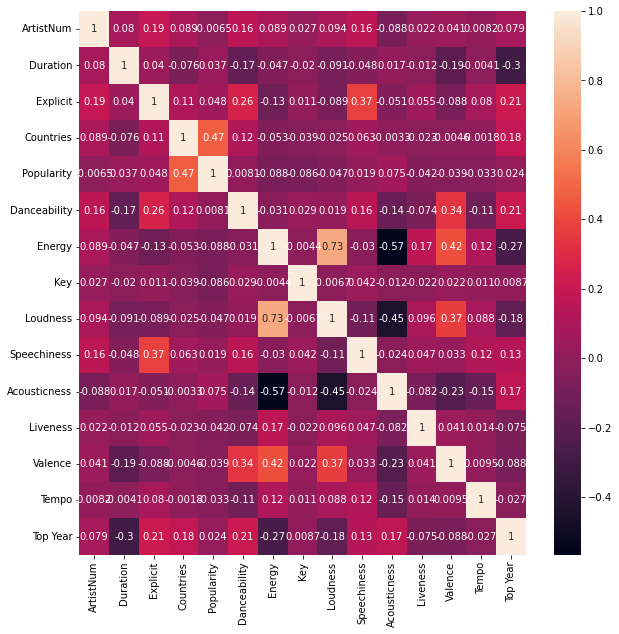

In [141]:
fig, ax = plt.subplots(figsize=(10,10))
corr_matrix = main.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

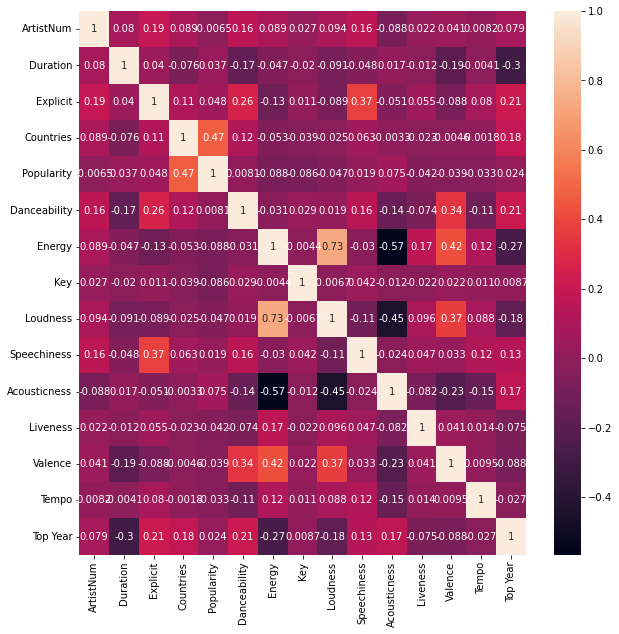

In [142]:
fig, ax = plt.subplots(figsize=(10,10))
corr_matrixRap = mainRap.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [143]:
features = ['Duration', 'Explicit', 'Countries', 'Popularity', 'Danceability','Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness','Valence', 'Tempo',]
list(enumerate(features))

[(0, 'Duration'),
 (1, 'Explicit'),
 (2, 'Countries'),
 (3, 'Popularity'),
 (4, 'Danceability'),
 (5, 'Energy'),
 (6, 'Key'),
 (7, 'Loudness'),
 (8, 'Speechiness'),
 (9, 'Acousticness'),
 (10, 'Liveness'),
 (11, 'Valence'),
 (12, 'Tempo')]

## Feature (Mean) by Year Plot

<Figure size 1440x1440 with 0 Axes>

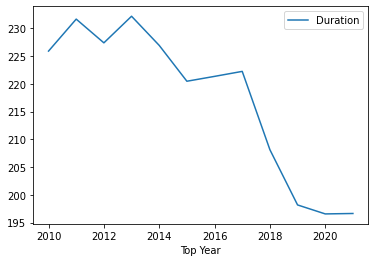

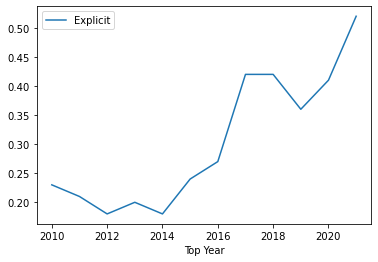

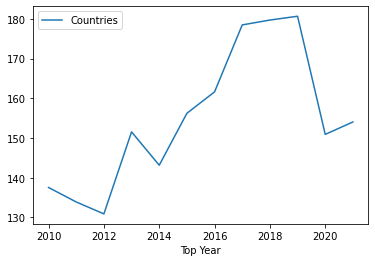

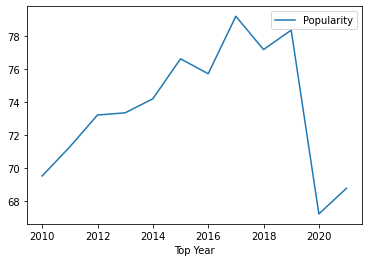

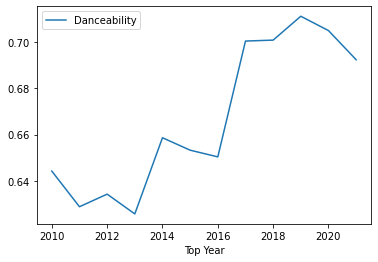

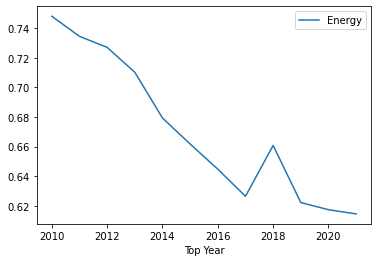

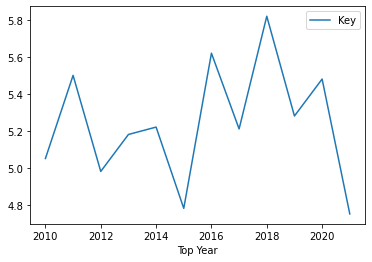

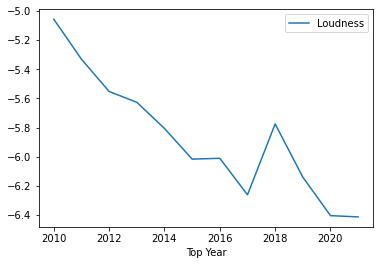

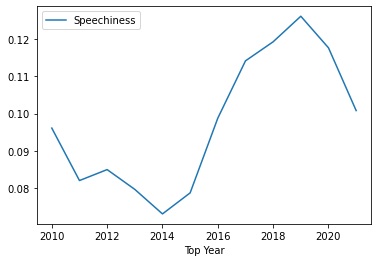

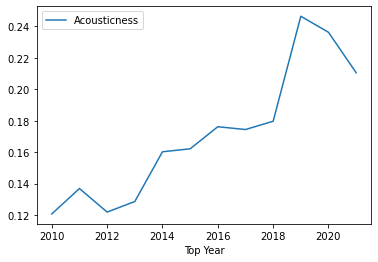

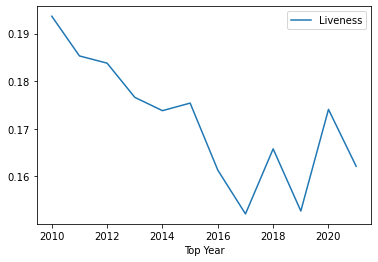

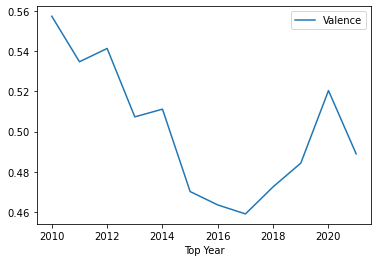

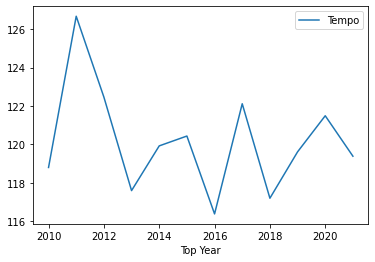

In [144]:
plt.figure(figsize=(20, 20))
for i in enumerate(features):
    main.groupby('Top Year').agg({i[1]:'mean'}).plot()
    plt.show()

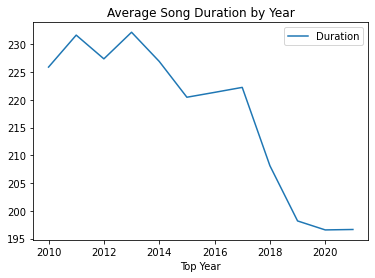

In [145]:
main.groupby('Top Year').agg({'Duration':'mean'}).plot()
plt.title('Average Song Duration by Year')
plt.show()

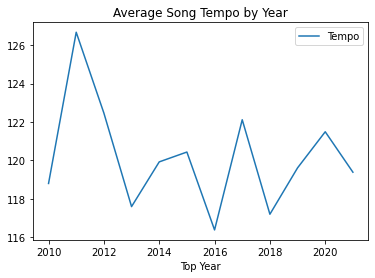

In [146]:
main.groupby('Top Year').agg({'Tempo':'mean'}).plot()
plt.title('Average Song Tempo by Year')
plt.show()

## Feature (Median) by Year Plot

<Figure size 1440x1440 with 0 Axes>

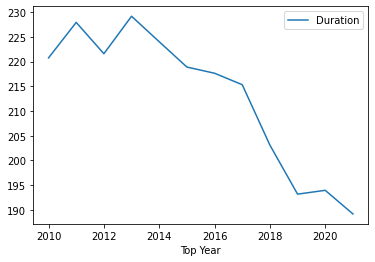

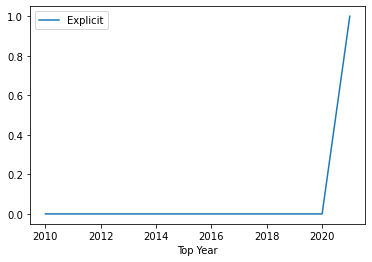

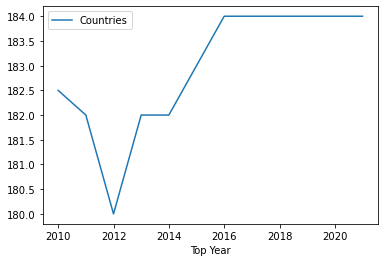

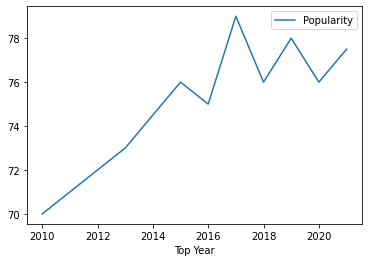

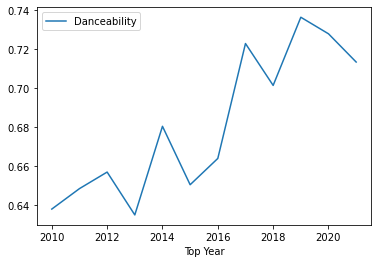

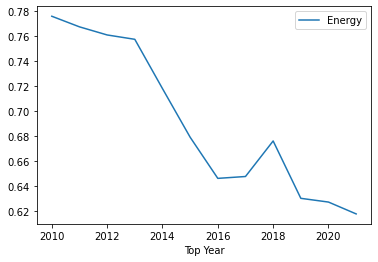

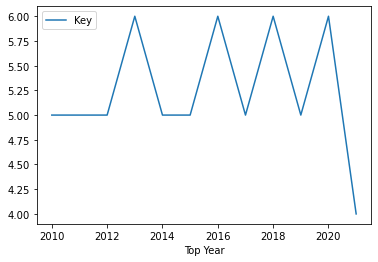

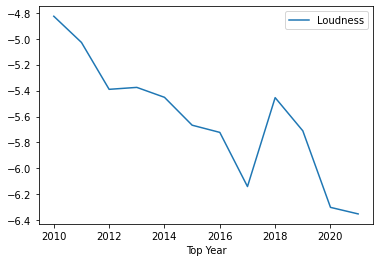

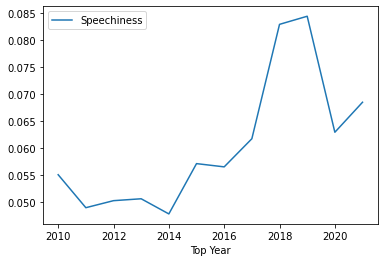

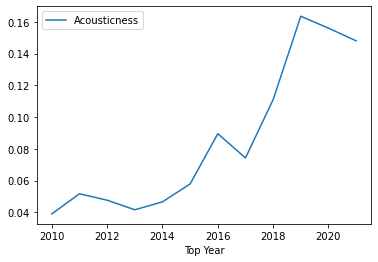

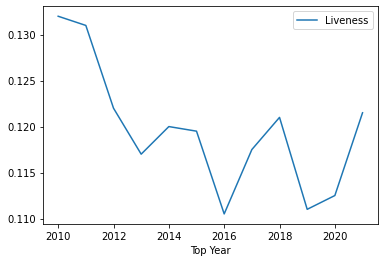

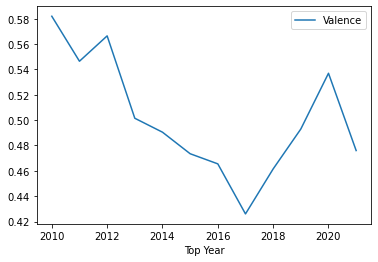

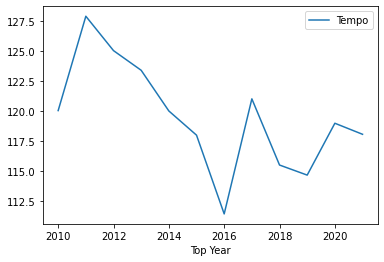

In [147]:
plt.figure(figsize=(20, 20))
for i in enumerate(features):
    main.groupby('Top Year').agg({i[1]:'median'}).plot()
    plt.show()

## Box Plots

<AxesSubplot:xlabel='Top Year', ylabel='Countries'>

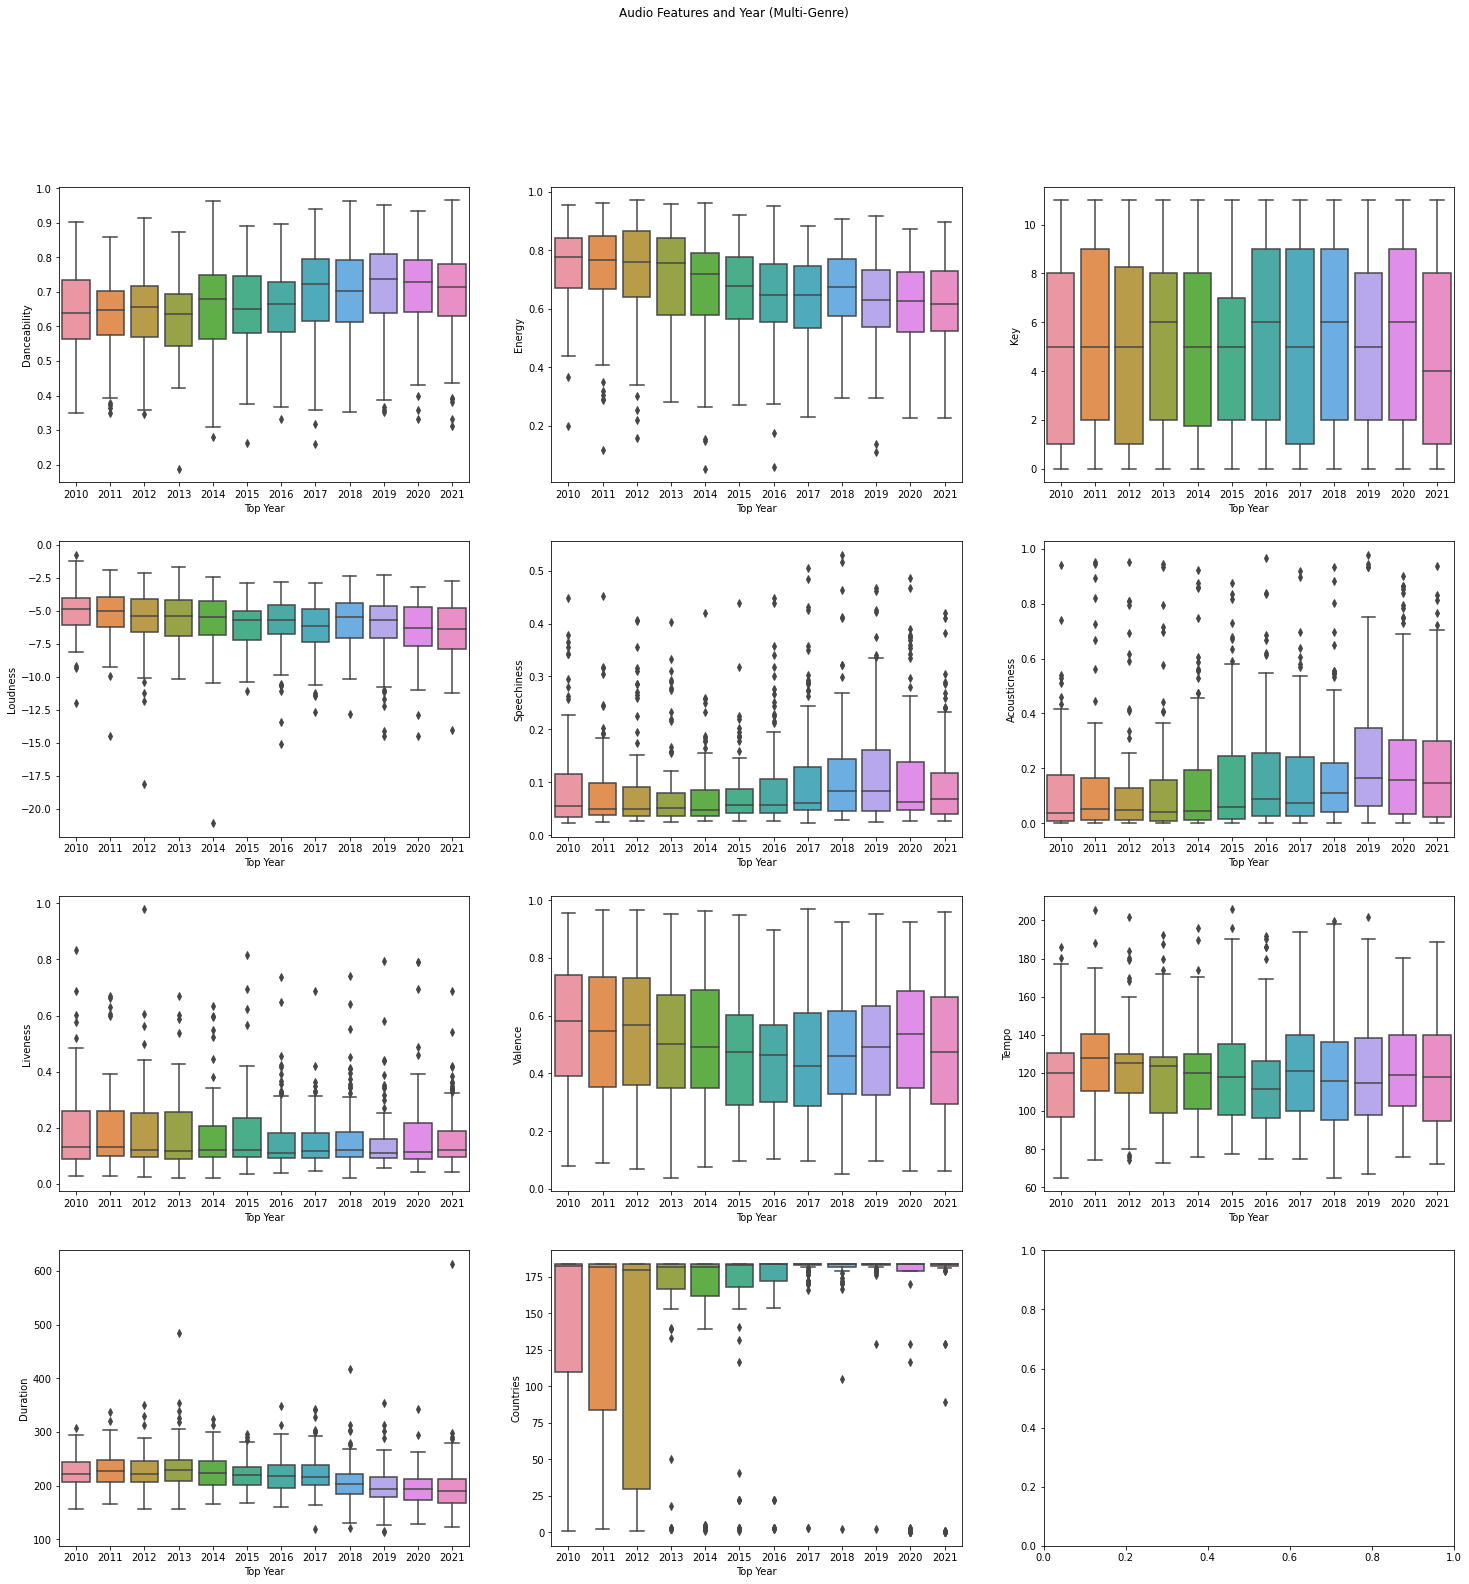

In [148]:
fig, axes = plt.subplots(4, 3, figsize=(25, 25))
 
fig.suptitle('Audio Features and Year (Multi-Genre)')
 
sns.boxplot(ax=axes[0, 0], data=main, x='Top Year', y='Danceability')
sns.boxplot(ax=axes[0, 1], data=main, x='Top Year', y='Energy')
sns.boxplot(ax=axes[0, 2], data=main, x='Top Year', y='Key')
sns.boxplot(ax=axes[1, 0], data=main, x='Top Year', y='Loudness')
sns.boxplot(ax=axes[1, 1], data=main, x='Top Year', y='Speechiness')
sns.boxplot(ax=axes[1, 2], data=main, x='Top Year', y='Acousticness')
sns.boxplot(ax=axes[2, 0], data=main, x='Top Year', y='Liveness')
sns.boxplot(ax=axes[2, 1], data=main, x='Top Year', y='Valence')
sns.boxplot(ax=axes[2, 2], data=main, x='Top Year', y='Tempo')
sns.boxplot(ax=axes[3, 0], data=main, x='Top Year', y='Duration')
sns.boxplot(ax=axes[3, 1], data=main, x='Top Year', y='Countries')

<AxesSubplot:xlabel='Top Year', ylabel='Countries'>

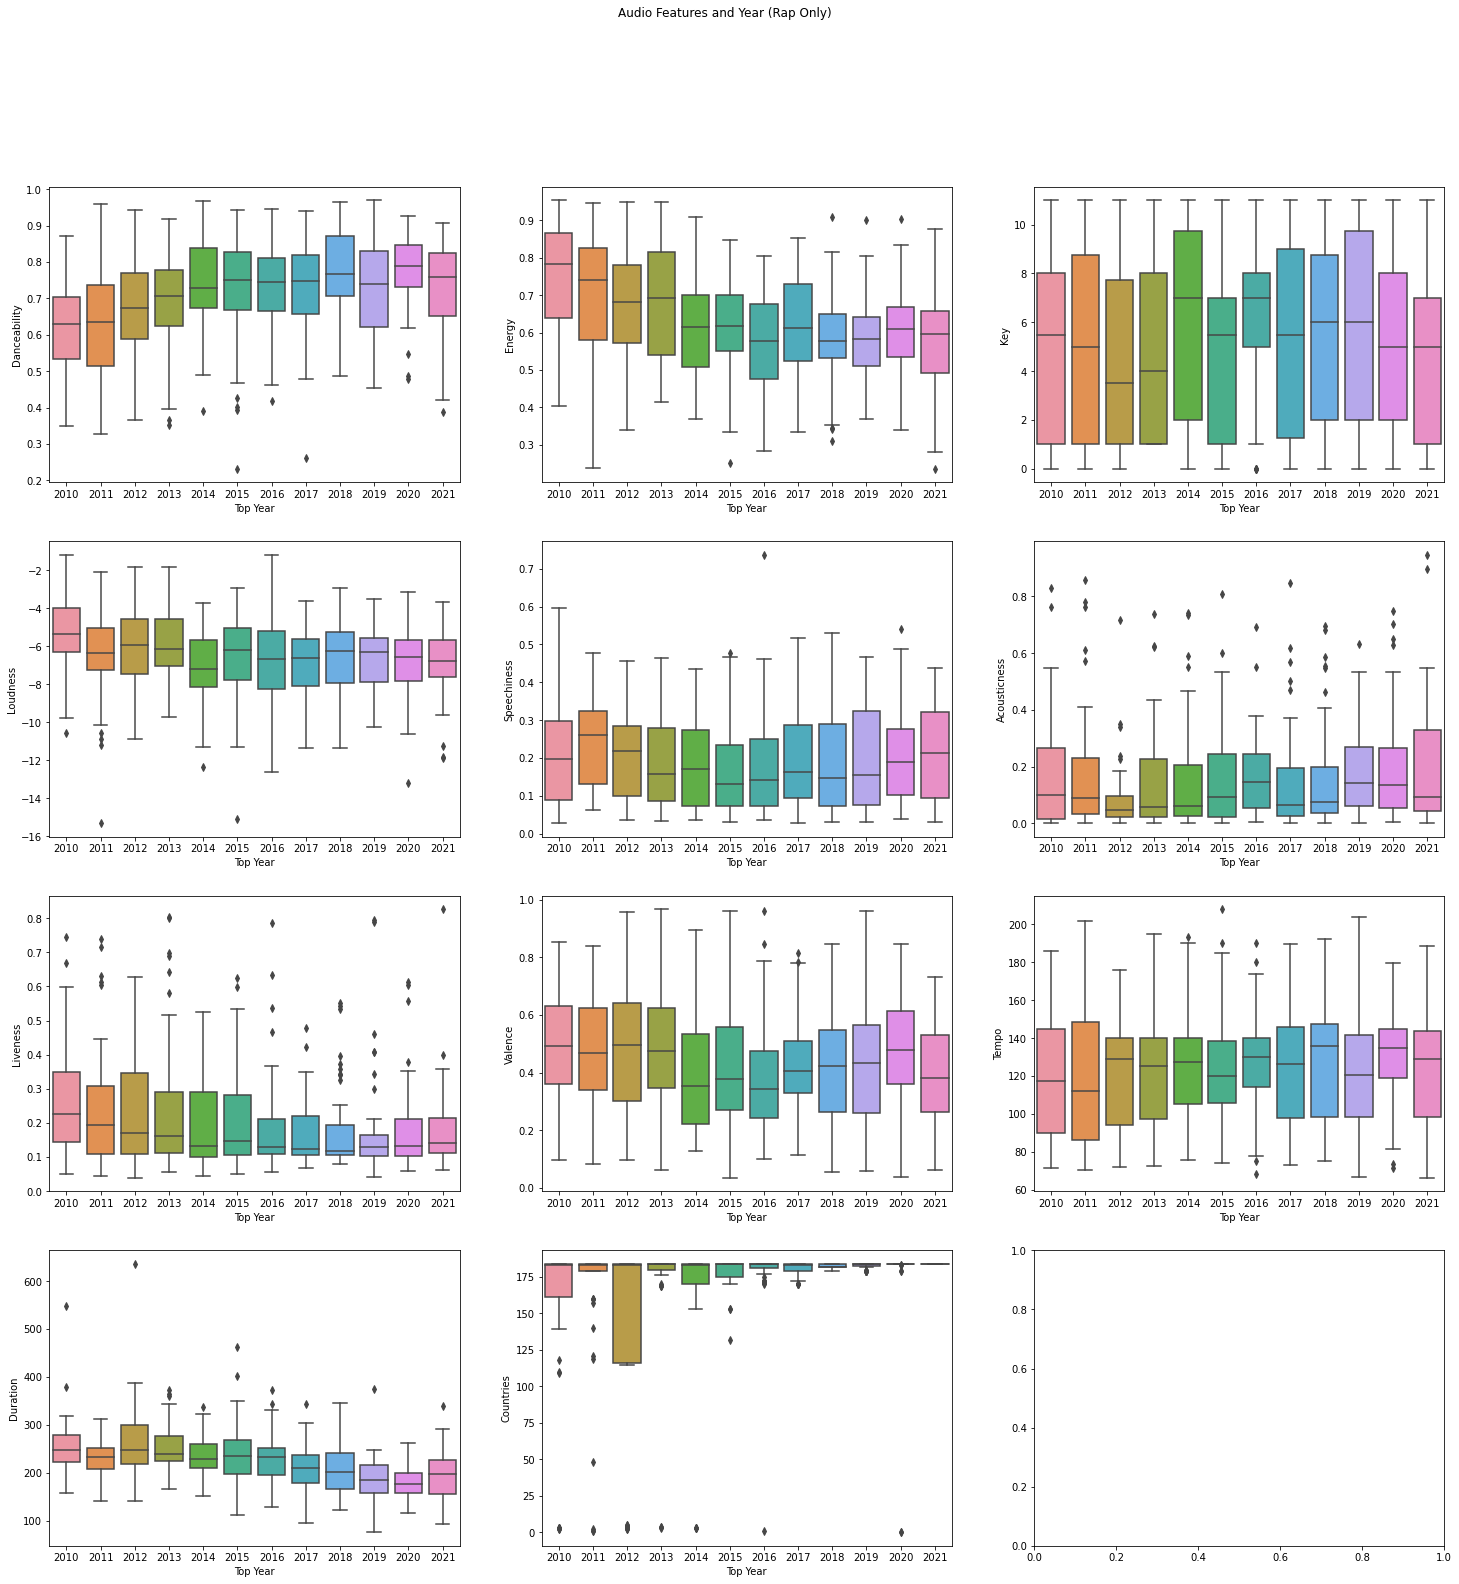

In [149]:
fig, axes = plt.subplots(4, 3, figsize=(25, 25))
 
fig.suptitle('Audio Features and Year (Rap Only)')
 
sns.boxplot(ax=axes[0, 0], data=mainRap, x='Top Year', y='Danceability')
sns.boxplot(ax=axes[0, 1], data=mainRap, x='Top Year', y='Energy')
sns.boxplot(ax=axes[0, 2], data=mainRap, x='Top Year', y='Key')
sns.boxplot(ax=axes[1, 0], data=mainRap, x='Top Year', y='Loudness')
sns.boxplot(ax=axes[1, 1], data=mainRap, x='Top Year', y='Speechiness')
sns.boxplot(ax=axes[1, 2], data=mainRap, x='Top Year', y='Acousticness')
sns.boxplot(ax=axes[2, 0], data=mainRap, x='Top Year', y='Liveness')
sns.boxplot(ax=axes[2, 1], data=mainRap, x='Top Year', y='Valence')
sns.boxplot(ax=axes[2, 2], data=mainRap, x='Top Year', y='Tempo')
sns.boxplot(ax=axes[3, 0], data=mainRap, x='Top Year', y='Duration')
sns.boxplot(ax=axes[3, 1], data=mainRap, x='Top Year', y='Countries')

## Scatter Plots with Regression Line

<AxesSubplot:xlabel='Top Year', ylabel='Countries'>

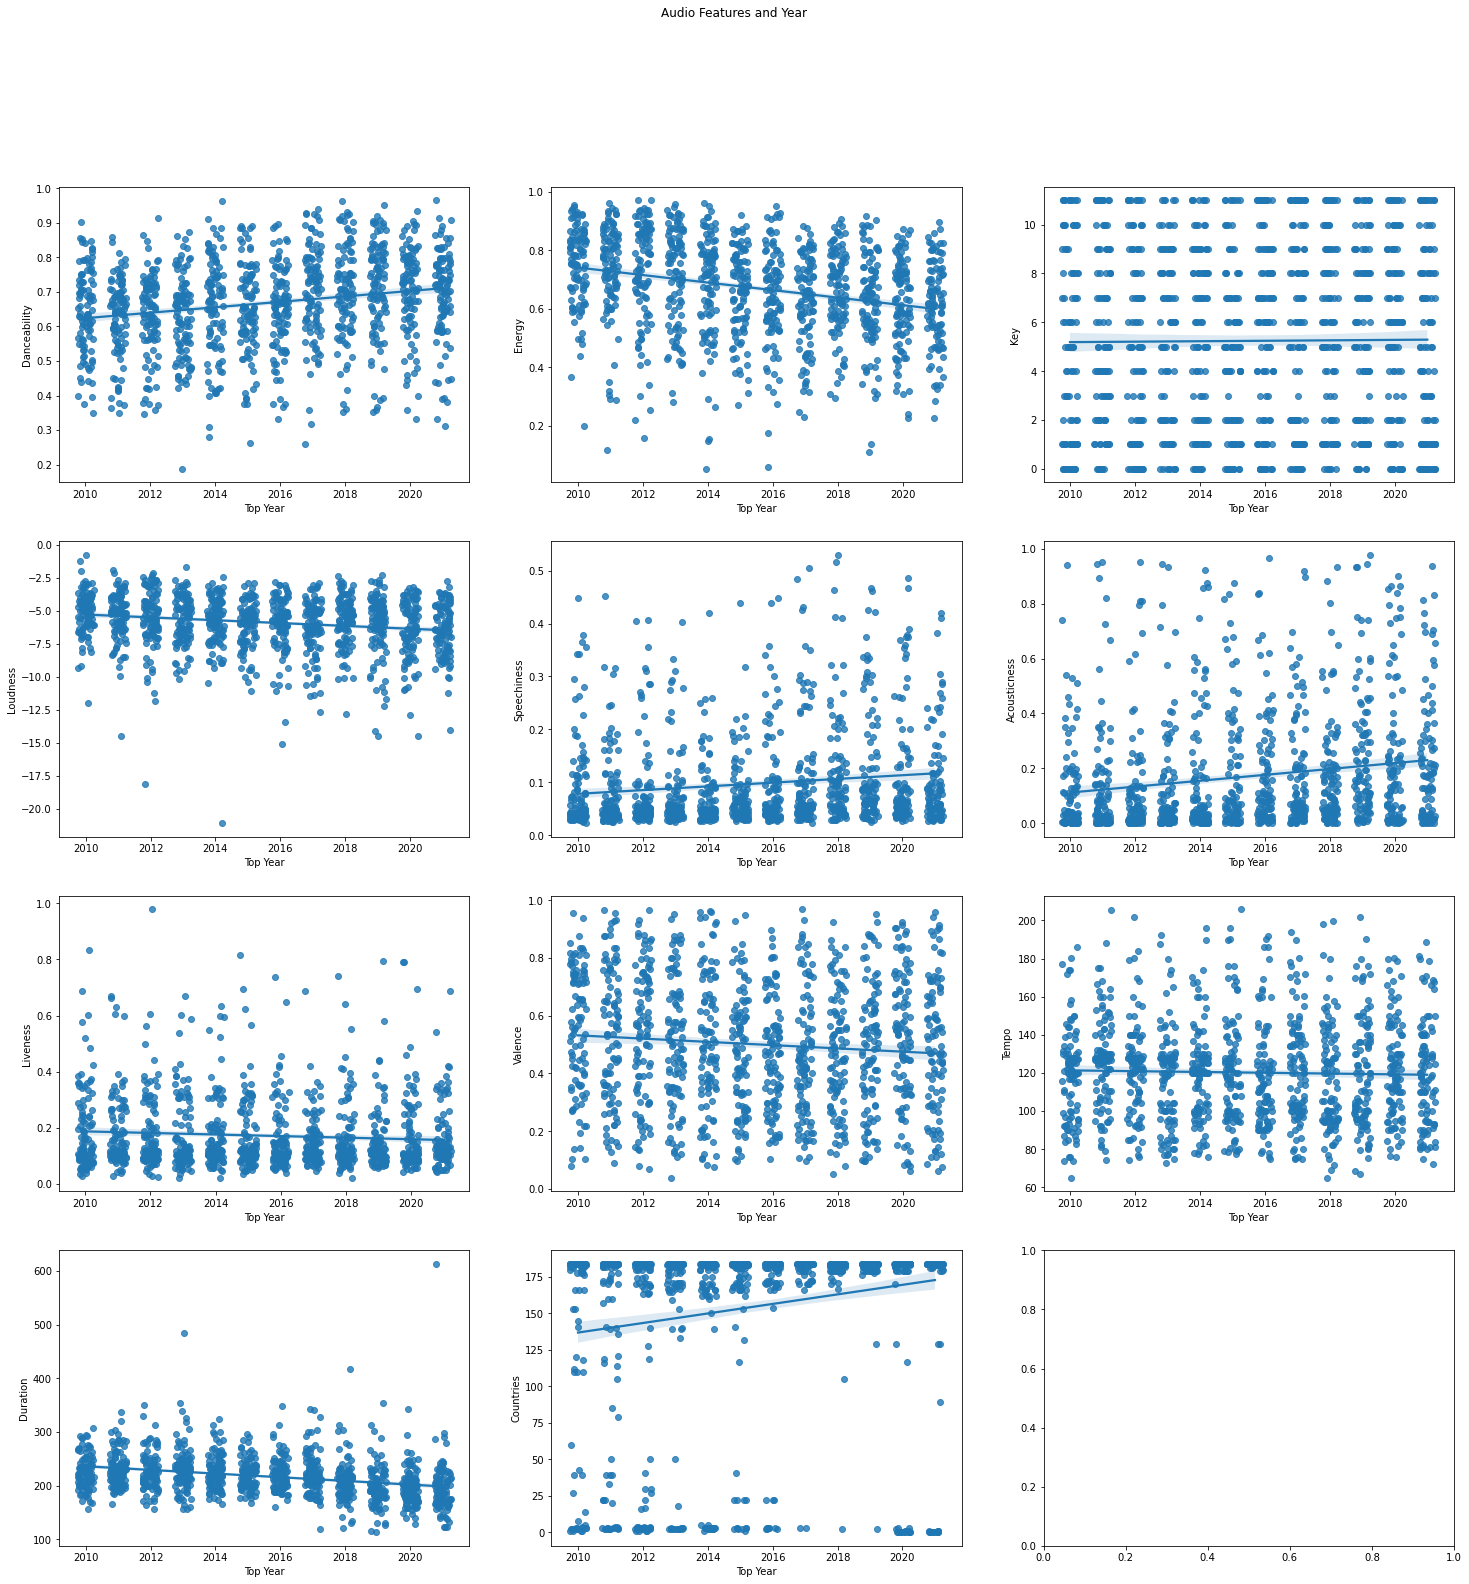

In [150]:
fig, axes = plt.subplots(4, 3, figsize=(25, 25))
 
fig.suptitle('Audio Features and Year')
 
sns.regplot(ax=axes[0, 0], data=main, x_jitter=.25, x='Top Year', y='Danceability')
sns.regplot(ax=axes[0, 1], data=main, x_jitter=.25, x='Top Year', y='Energy')
sns.regplot(ax=axes[0, 2], data=main, x_jitter=.25, x='Top Year', y='Key')
sns.regplot(ax=axes[1, 0], data=main, x_jitter=.25, x='Top Year', y='Loudness')
sns.regplot(ax=axes[1, 1], data=main, x_jitter=.25, x='Top Year', y='Speechiness')
sns.regplot(ax=axes[1, 2], data=main, x_jitter=.25, x='Top Year', y='Acousticness')
sns.regplot(ax=axes[2, 0], data=main, x_jitter=.25, x='Top Year', y='Liveness')
sns.regplot(ax=axes[2, 1], data=main, x_jitter=.25, x='Top Year', y='Valence')
sns.regplot(ax=axes[2, 2], data=main, x_jitter=.25, x='Top Year', y='Tempo')
sns.regplot(ax=axes[3, 0], data=main, x_jitter=.25, x='Top Year', y='Duration')
sns.regplot(ax=axes[3, 1], data=main, x_jitter=.25, x='Top Year', y='Countries')

#  Regression & Annova Testing 

In [151]:
def ols_analysis_df(df, xlist, ylist):
    d = []
    for i in range(len(ylist)):
        x = df[xlist[0]]
        y = df[ylist[i]]
        x = sm.add_constant(x)
        model = sm.OLS(y, x).fit()
        d.append(
        {
            'Feature': yList[i],
            'R-Squared': model.rsquared,
            'Coefficient Value': model.params[1],
            'Standard Error':  model.bse[1],
            'F-pValue': model.f_pvalue
        })
    d = pd.DataFrame(d)
    return d  

In [152]:
yList = ['Duration', 'Countries', "Explicit", 'Danceability','Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness','Valence']
xList = ["Top Year"]

In [153]:
regression_df = ols_analysis_df(main, xList, yList)
regression_df

,Feature,R-Squared,Coefficient Value,Standard Error,F-pValue
0,Duration,0.090888,-3.414839,0.312031,1.234998e-26
1,Countries,0.034092,3.269266,0.502765,1.156555e-10
2,Explicit,0.045232,0.028322,0.003759,9.690166e-14
3,Danceability,0.043116,0.007873,0.001072,3.735582e-13
4,Energy,0.073041,-0.012879,0.001326,1.568973e-21
5,Loudness,0.031614,-0.107611,0.017207,5.561008e-10
6,Speechiness,0.017079,0.003516,0.000771,5.574326e-06
7,Acousticness,0.028946,0.010715,0.001793,3.014982e-09
8,Liveness,0.005552,-0.002792,0.001080,9.822202e-03
9,Valence,0.007795,-0.005657,0.001844,2.204135e-03


In [154]:
regression_dfRap = ols_analysis_df(mainRap, xList, yList)
regression_dfRap

,Feature,R-Squared,Coefficient Value,Standard Error,F-pValue
0,Duration,0.167720,-6.951632,0.633254,1.143151e-25
1,Countries,0.069607,3.117832,0.466133,5.178633e-11
2,Explicit,0.000295,0.001119,0.002661,6.743333e-01
3,Danceability,0.076549,0.011379,0.001616,5.270053e-12
4,Energy,0.097194,-0.013103,0.001633,5.442434e-15
5,Loudness,0.021667,-0.087690,0.024096,2.971363e-04
6,Speechiness,0.001382,-0.001358,0.001493,3.633848e-01
7,Acousticness,0.005893,0.004146,0.002202,6.020786e-02
8,Liveness,0.033670,-0.007906,0.001732,6.074690e-06
9,Valence,0.010420,-0.006062,0.002416,1.235973e-02


<AxesSubplot:title={'center':'P-value for each Audio Feature (Multi-Genre)'}, xlabel='Feature'>

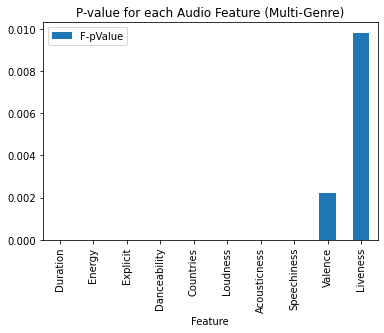

In [155]:
regression_df_sorted = regression_df.sort_values('F-pValue')
regression_df_sorted.plot.bar(x = 'Feature', y = 'F-pValue', title = 'P-value for each Audio Feature (Multi-Genre)' )

<AxesSubplot:title={'center':'P-value for each Audio Feature (Rap Only)'}, xlabel='Feature'>

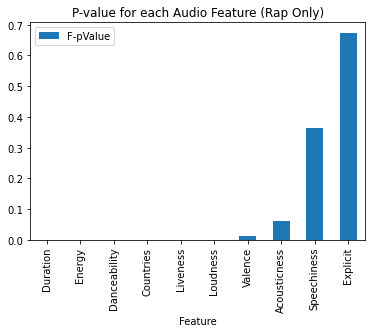

In [156]:
regression_dfRap_sorted = regression_dfRap.sort_values('F-pValue')
regression_dfRap_sorted.plot.bar(x = 'Feature', y = 'F-pValue', title = 'P-value for each Audio Feature (Rap Only)' )

<AxesSubplot:title={'center':'R^2 for each Audio Feature (Multi-Genre)'}, xlabel='Feature'>

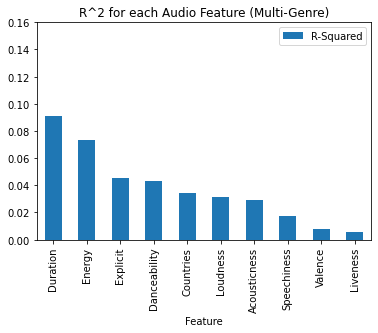

In [157]:
regression_df_sorted = regression_df.sort_values('R-Squared', ascending=False)
regression_df_sorted.plot.bar(x = 'Feature', y = 'R-Squared', ylim = (0,0.16), title = 'R^2 for each Audio Feature (Multi-Genre)' )

<AxesSubplot:title={'center':'R^2 for each Audio Feature (Rap Only)'}, xlabel='Feature'>

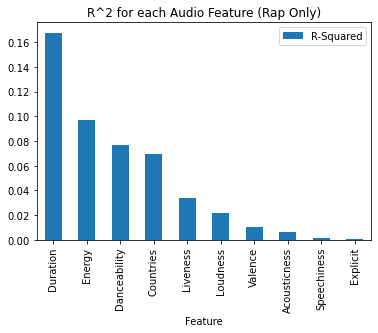

In [158]:
regression_dfRap_sorted = regression_dfRap.sort_values('R-Squared', ascending=False)
regression_dfRap_sorted.plot.bar(x = 'Feature', y = 'R-Squared', title = 'R^2 for each Audio Feature (Rap Only)' )